<a href="https://colab.research.google.com/github/Ohara124c41/Graduate_Technical_Writing/blob/master/IsingModel_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

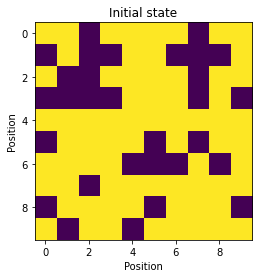

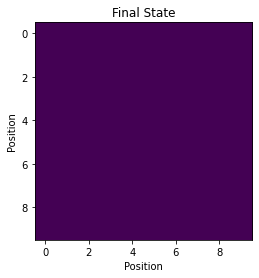

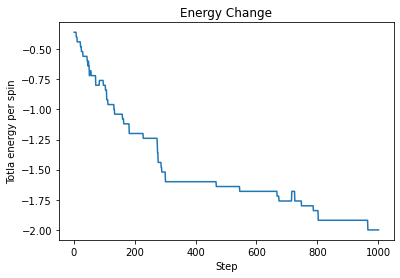

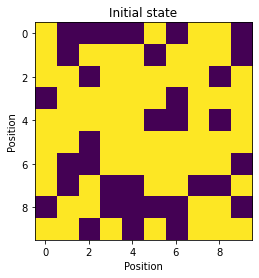

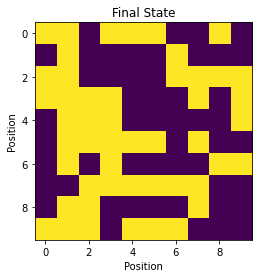

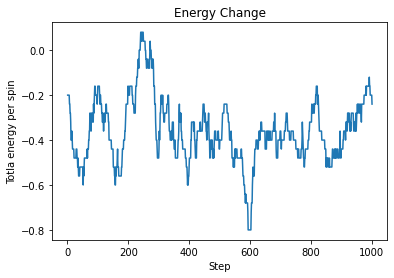

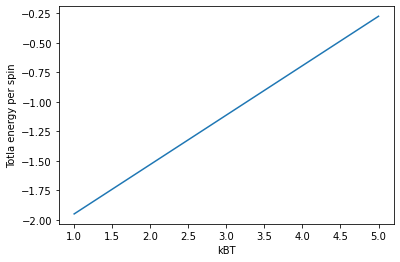

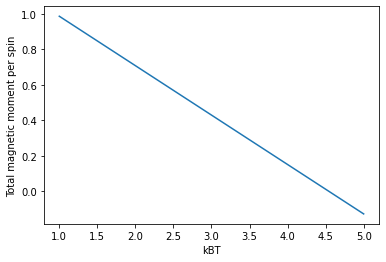

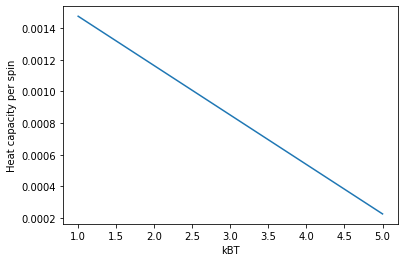

In [ ]:
#
# 2D Ising model "IsingModel_2D"
#

from random import random, randrange
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

def E_int(array, Nx,Ny):   #interaction term
    temp=0
    for i in range(0,Nx):
        for j in range(0,Ny):
            a=i+1
            if i == Nx-1:
                a=0
            temp=temp+array[i,j]*array[a,j] 

    for i in range(0,Nx):
        for j in range(0,Ny):
            c=j+1
            if j== Ny-1 :
                c=0
            temp=temp+array[i,j]*array[i,c] 
    return temp


def s_ini(s, Nx,Ny):        #initial state (random)
    for k in range(int(Nx*Ny/2)):
        i=randrange(Nx) 
        j=randrange(Ny) 
        s[i,j]=-1*s[i,j]
    return s


ET_plot=[]
MT_plot=[]
CT_plot=[]

KBT_list=[1,5]    # Temperature
N_step =1000         # Nuber of step
Nave_step=int(N_step/10) 
Nx= 10 # size of lattice (x direction)
Ny= 10  # size of lattice (y direction)
J = 1.0 # Interaction energy
B = 0.0 # External field



for KBT in KBT_list:  
    s= np.ones([Nx,Ny], int)  # initial state 
    s=s_ini(s, Nx,Ny)  

    plt.imshow(s)  # Initial state display
    plt.title("Initial state")
    plt.xlabel("Position")
    plt.ylabel("Position")
    plt.show()

    E = -J* E_int(s, Nx,Ny) -B*np.sum(s)    # Enerty calculation of the initial state
    E2 = E*E  

    E_plot = []  
    E_plot.append(E/(Nx*Ny))
    E2_plot = [] 
    E2_plot.append((E/(Nx*Ny))*(E/(Nx*Ny)))


    M = np.sum(s)  
    M_plot = []
    Mave_plot=[]
    M_plot.append(M/(Nx*Ny)) 
    Mave_plot.append(M/(Nx*Ny)) 

    
    for k in range(N_step):
        i=randrange(Nx)    # [i,j]:trial point
        j=randrange(Ny) 

        s_trial=s.copy()
        s_trial[i,j]= -1*s[i,j]

        a=i+1
        b=i-1
        c=j+1
        d=j-1
        if i==Nx-1 :
           a=0
        if i==0 :
           b=Nx-1
        if j==Ny-1 :
           c=0
        if j==0 :
          d=Ny-1 

        delta_E=2*s_trial[i,j]*-1*J*(s[a,j]+s[b,j]+s[i,c]+s[i,d])-B*(s_trial[i,j]-s[i,j])
        E_trial =E+  delta_E


        if E_trial < E :                #Metropolis method
            s = s_trial
            E = E_trial
        else :
            if random() < np.exp(-(delta_E)/KBT):
                s = s_trial
                E = E_trial



        E_plot.append(E/(Nx*Ny))
        E2_plot.append((E/(Nx*Ny))**2)
        M = np.sum(s)
        M_plot.append(M/(Nx*Ny))

    ET_plot.append(np.sum(E_plot[-Nave_step:])/Nave_step)
    MT_plot.append(np.sum(M_plot[-Nave_step:])/Nave_step)
    CT_plot.append((np.sum(E2_plot[-Nave_step:])/Nave_step-((np.sum(E_plot[-Nave_step:]))/Nave_step)**2)/KBT**2)  
 
 
    plt.imshow(s)     # Final state display
    plt.title("Final State")
    plt.xlabel("Position")
    plt.ylabel("Position")
    plt.show()

    plt.plot(np.linspace(1,N_step+1, N_step+1) ,E_plot)
    plt.title("Energy Change")
    plt.ylabel("Totla energy per spin")
    plt.xlabel("Step")
    plt.show()





plt.plot(KBT_list,ET_plot)
plt.ylabel("Totla energy per spin")
plt.xlabel("kBT")
plt.show()

plt.plot(KBT_list,MT_plot)
plt.ylabel("Total magnetic moment per spin")
plt.xlabel("kBT")
plt.show()


plt.plot(KBT_list,CT_plot)
plt.ylabel("Heat capacity per spin")
plt.xlabel("kBT")
plt.show()


